In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:36<00:00, 24.7MB/s]
100% 812M/812M [00:36<00:00, 23.1MB/s]


In [3]:
from zipfile import ZipFile
file_name = '/content/dogs-vs-cats.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
from zipfile import ZipFile
file_name = '/content/train.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
import os
path , dirs , files = next(os.walk('/content/train'))
file_count = len(files)
print(file_count)

25000


In [6]:
file_names = os.listdir('/content/train')
print(file_names[:10])

['cat.2732.jpg', 'dog.998.jpg', 'dog.6851.jpg', 'dog.7429.jpg', 'cat.8960.jpg', 'dog.8047.jpg', 'dog.4244.jpg', 'cat.4058.jpg', 'dog.8145.jpg', 'dog.5632.jpg']


In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import cv2 as cv
import glob

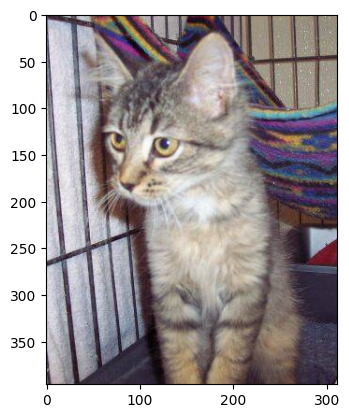

In [8]:
img = mpimg.imread('/content/train/cat.2.jpg')
plt.imshow(img)

In [9]:
c1 = 0
c2 = 0

for i in range(len(file_names)):
    name = file_names[i]
    if 'cat' in name:
        c1 += 1
    else:
        c2 += 1

print(c1,c2)

12500 12500


In [10]:
os.mkdir('/content/image resize')

In [11]:
original_folder = '/content/train'
resize_folder = '/content/image resize'

In [12]:
for i in range(2000):
  filename = os.path.join(original_folder,file_names[i])
  img = Image.open(filename)
  img = img.resize((224,224))
  img = img.convert("RGB")

  img.save(os.path.join(resize_folder,file_names[i]))


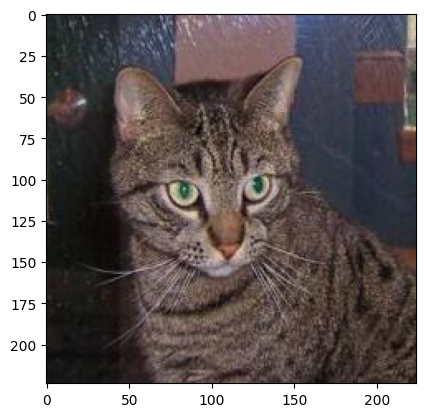

In [14]:
img = mpimg.imread('/content/image resize/cat.1.jpg')
plt.imshow(img)

In [15]:
file_names = os.listdir('/content/image resize')
print(file_names[:10])

['cat.2732.jpg', 'dog.998.jpg', 'dog.6851.jpg', 'dog.7429.jpg', 'cat.8960.jpg', 'dog.8047.jpg', 'dog.4244.jpg', 'cat.4058.jpg', 'dog.8145.jpg', 'dog.5632.jpg']


labelling

In [16]:
labels = []
for i in range(2000):
  name = file_names[i]
  if 'cat' in name:
    labels.append(0)
  else:
    labels.append(1)

print(labels[:10])

[0, 1, 1, 1, 0, 1, 1, 0, 1, 1]


In [17]:
values, counts = np.unique(labels, return_counts=True)
print(values,counts)

[0 1] [1042  958]


In [18]:
image_directory = '/content/image resize/'
image_extension = ['png', 'jpg']
files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv.imread(file) for file in files])
dog_cat_labels = np.asarray(labels)

In [19]:
print(dog_cat_images)


[[[[ 66  75  85]
   [ 60  69  79]
   [ 45  54  63]
   ...
   [193 189 184]
   [192 188 183]
   [192 188 183]]

  [[ 35  44  54]
   [ 41  50  60]
   [ 47  56  65]
   ...
   [196 192 187]
   [195 191 186]
   [195 191 186]]

  [[ 25  35  45]
   [ 29  39  49]
   [ 36  46  56]
   ...
   [196 191 188]
   [196 191 188]
   [196 191 188]]

  ...

  [[151 154 159]
   [150 153 158]
   [150 153 158]
   ...
   [169 167 173]
   [165 163 169]
   [162 160 166]]

  [[145 148 153]
   [149 152 157]
   [153 156 161]
   ...
   [166 164 170]
   [164 162 168]
   [162 160 166]]

  [[142 145 150]
   [150 153 158]
   [159 162 167]
   ...
   [163 161 167]
   [163 161 167]
   [163 161 167]]]


 [[[ 42  93  65]
   [ 42  93  65]
   [ 42  93  65]
   ...
   [ 54 114  90]
   [ 53 113  89]
   [ 52 112  88]]

  [[ 42  93  65]
   [ 42  93  65]
   [ 43  94  66]
   ...
   [ 54 114  90]
   [ 53 113  89]
   [ 52 112  88]]

  [[ 42  93  65]
   [ 43  94  66]
   [ 43  94  66]
   ...
   [ 54 114  90]
   [ 53 113  89]
   [ 52 112

In [20]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [21]:
x = dog_cat_images
y = dog_cat_labels

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
print(x_train_scaled.shape)
y_train.shape


(1600, 224, 224, 3)


(1600,)

In [32]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [47]:
num_of_classes = 1
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(224,224,3)),
    MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_of_classes, activation='sigmoid')
])


In [48]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │          62,721 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,320,705 (8.85 MB)

 Trainable params: 2,286,593 (8.72 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [49]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy,
    metrics = ['accuracy']
    )

In [50]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 55s 104ms/step - accuracy: 0.7872 - loss: 1.2884
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9284 - loss: 0.1900
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9680 - loss: 0.0726
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9884 - loss: 0.0409
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9742 - loss: 0.0773


In [51]:
acc, loss = model.evaluate(x_test_scaled,y_test)
print("Accuracy: ",acc)
print("Loss: ",loss)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.8446 - loss: 3.1819
Accuracy 3.140517473220825
Loss 0.8525000214576721


In [55]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/test_cat.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted: Cat
